Trabalhando com Excel e Pandas

In [1]:
#importando pandas
import pandas as pd

In [2]:
#leitura dos arquivos excel
dfArc = pd.read_excel("/content/Aracaju.xlsx")
dfFort = pd.read_excel("/content/Fortaleza.xlsx")
dfNat = pd.read_excel("/content/Natal.xlsx")
dfRec = pd.read_excel("/content/Recife.xlsx")
dfSalv = pd.read_excel("/content/Salvador.xlsx")

In [3]:
dfArc.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
#para juntar os arquivos
df = pd.concat([dfArc, dfFort, dfNat, dfRec, dfSalv])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [7]:
#para alterar os tipos de dados de uma coluna faz-se da seguinte maneira
df['LojaID'] = df['LojaID'].astype('object')

In [13]:
#consultando valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#substituindo valores nulos
df['Vendas'].fillna(df["Vendas"].mean(), inplace = True)

In [ ]:
#apagando valores nulos
df.dropna(inplace=True)

criando novas colunas

In [14]:
#criando coluna de receitas
df['Receita'] = df["Vendas"].mul(df['Qtde'])
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
5,Aracaju,2018-01-01,156.20,1522,1,156.20
6,Aracaju,2018-01-01,35.50,1522,2,71.00
7,Aracaju,2019-01-01,172.22,1522,6,1033.32
8,Aracaju,2019-01-01,12.16,1523,1,12.16
9,Aracaju,2019-01-01,149.36,1523,3,448.08


In [15]:
#retornando a maior receita
df["Receita"].max()

3544.0

In [16]:
#retornando a menor receita
df["Receita"].min()

3.34

In [17]:
#nlargest retorna o top N com base em uma coluna
df.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [18]:
#nsmallest retorna os piores N com base em uma coluna
df.nsmallest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [19]:
#agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [20]:
#ordenando conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com Datas** 

In [21]:
#transformando a coluna datas p formato inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [25]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [24]:
#transformando a coluna data para data
df["Data"] = pd.to_datetime(df["Data"])

In [26]:
#agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [27]:
df["Ano_Venda"] = df["Data"].dt.year

In [34]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
103,Salvador,2019-01-01,191.60,1034,1,191.60,2019,1,1,365 days
22,Natal,2018-06-21,621.00,853,3,1863.00,2018,6,21,171 days
70,Natal,2019-02-14,743.00,854,4,2972.00,2019,2,14,409 days
66,Fortaleza,2019-01-01,35.11,1005,6,210.66,2019,1,1,365 days
208,Salvador,2019-01-02,39.40,1036,3,118.20,2019,1,2,366 days
182,Natal,2019-01-02,6.60,1037,2,13.20,2019,1,2,366 days
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days
148,Salvador,2019-01-02,40.59,1037,3,121.77,2019,1,2,366 days
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,454 days
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days


In [30]:
#extraindo o mes de venda 
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [31]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [33]:
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [35]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [36]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days
126,Fortaleza,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days


## *Visualização de Dados com Gráficos*

In [37]:
df["LojaID"].value_counts(ascending=True)

1003     20
1521     21
853      26
1004     28
854      28
1523     29
852      29
1002     30
1005     30
981      31
980      36
1520     39
1522     41
982      44
983      65
1034     67
1037    101
1035    112
1036    117
Name: LojaID, dtype: int64

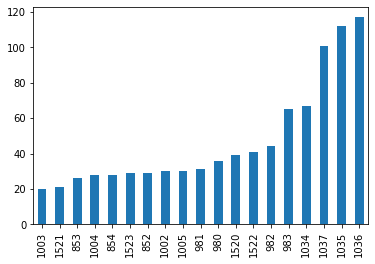

In [38]:
#grafico de barras 
df["LojaID"].value_counts(ascending=True).plot.bar()

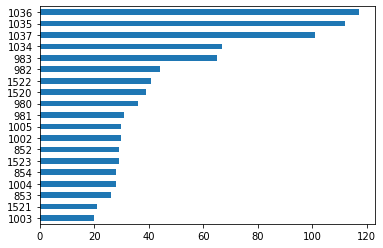

In [40]:
#criando grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

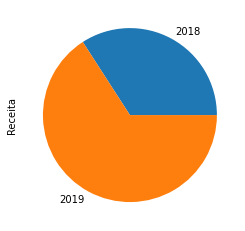

In [42]:
#Grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [43]:
#Total vendas por cidades
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

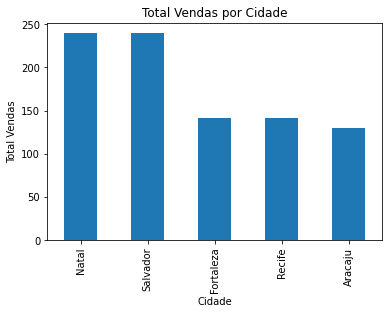

In [44]:
#adicionando titulo e alterando nomes dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

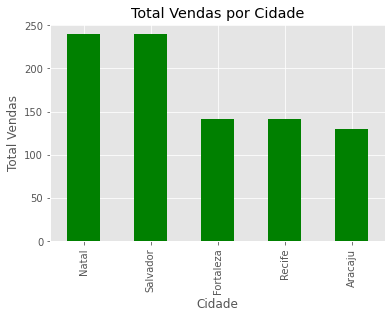

In [47]:
#alterando as cores
df['Cidade'].value_counts().plot.bar(title="Total Vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [46]:
#alterando o estilo dos gráficos
#pesquisar na lib da biblioteca
plt.style.use("ggplot")

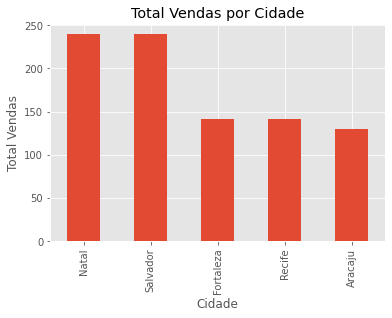

In [48]:
#salvando imagem 
df['Cidade'].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");
plt.savefig("grafico_vendas_cidade.png")